<a href="https://colab.research.google.com/github/Arush0113/CE784/blob/main/Arush_190181_Assignment1_CE784.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import os
import glob
from skimage import io, color
from skimage.feature.texture import greycomatrix, greycoprops
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy
import cv2 
import math
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
% matplotlib inline

In [2]:
train_path = '/content/drive/MyDrive/mod_ravelling_dataset/train'
test_path = '/content/drive/MyDrive/mod_ravelling_dataset/test'

In [3]:
non_raveling_train = train_path + '/Non_raveling'
raveling_train = train_path + '/Raveling'
test = test_path

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
list_nr_train = os.listdir(non_raveling_train)
list_r_train = os.listdir(raveling_train)
list_test = os.listdir(test)

In [6]:
list_r_train[:5]

['image406.jpg',
 'image682.jpg',
 'image644.jpg',
 'image451.jpg',
 'image485.jpg']

In [7]:
img = []

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


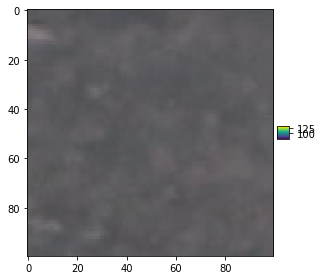

In [8]:
images_nr = []

for i in range(len(list_nr_train)):
  img = io.imread(os.path.join(non_raveling_train,list_nr_train[i]))
  images_nr.append(np.array(img))
  io.imshow(img)


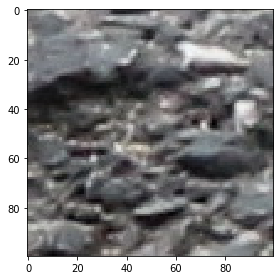

In [9]:
images_r = []

for i in range(len(list_r_train)):
  img = io.imread(os.path.join(raveling_train, list_r_train[i]))
  images_r.append(np.array(img))
  io.imshow(img)

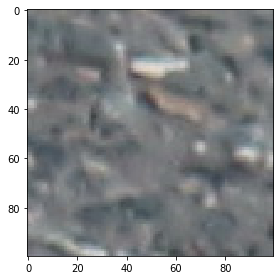

In [65]:
images_test = []

for i in range(len(list_test)):
  img = io.imread(os.path.join(test, list_test[i]))
  images_test.append(np.array(img))
  io.imshow(img)

In [66]:
print(len(images_nr))
print(len(images_r))
print(len(images_test))

351
349
300


In [11]:
images_nr = np.array(images_nr)
print(images_nr.shape)

y_nr = np.zeros((351, 1))
y_nr.shape

(351, 100, 100, 3)


(351, 1)

In [12]:
images_r = np.array(images_r)
images_r.shape

y_r = np.ones((349, 1))
y_r.shape

(349, 1)

In [13]:
images = np.concatenate((images_nr, images_r), axis = 0)
images.shape
y = np.concatenate((y_nr, y_r), axis = 0)
y.shape

(700, 1)

In [14]:
permutations = np.random.permutation(700)

images = images[permutations]
y = y[permutations]

In [15]:
y[permutations][:5]

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.]])

In [16]:
train_len = (int)(0.8 * len(images))
images_train = images[:train_len]
images_val = images[train_len:]
y_train = y[:train_len]
y_val = y[train_len:]

In [17]:
train_len

630

## Feature Extraction & MLP

In [18]:
#Loading important libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [55]:
l1 = len(non_raveling_train)
l2 = len(raveling_train)
l = len(images)

mean_b, mean_g, mean_r = np.zeros(l), np.zeros(l), np.zeros(l)

std_b, std_g, std_r = np.zeros(l), np.zeros(l), np.zeros(l)

skew_b, skew_g, skew_r = np.zeros(l), np.zeros(l), np.zeros(l)

kurt_b, kurt_g, kurt_r = np.zeros(l), np.zeros(l), np.zeros(l)

entropy_b1, entropy_g1, entropy_r1 = np.zeros(l), np.zeros(l), np.zeros(l)


for i in range(len(images)):
    image = images[i]
    # print(image.shape)
    # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blue = image[:,:,0]
    green = image[:,:,1]
    red = image[:,:,2]
    
    mean1 = (np.sum(image[:,:,0]))/(100*100)
    mean2 = (np.sum(image[:,:,1]))/(100*100)
    mean3 = (np.sum(image[:,:,2]))/(100*100)
    
    mean_b[i] = mean1
    mean_g[i] = mean2
    mean_r[i] = mean3
    
    sq_diff1 = np.sum(np.square((blue-mean1)))
    sq_diff2 = np.sum(np.square((green-mean2)))
    sq_diff3 = np.sum(np.square((red-mean3)))
    
    std_b[i] = math.sqrt(sq_diff1/(100*100))
    std_g[i] = math.sqrt(sq_diff2/(100*100))
    std_r[i] = math.sqrt(sq_diff3/(100*100))
    
    sq_skew1 = (np.sum(np.power((blue-mean1),3)))/(100*100)
    sq_skew2 = (np.sum(np.power((green-mean2),3)))/(100*100)
    sq_skew3 = (np.sum(np.power((red-mean3),3)))/(100*100)
    
    sq_kurt1 = (np.sum(np.power((blue-mean1),4)))/(100*100)
    sq_kurt2 = (np.sum(np.power((green-mean2),4)))/(100*100)
    sq_kurt3 = (np.sum(np.power((red-mean3),4)))/(100*100)
    
    skew_b[i] = sq_skew1/(std_b[i]**3)
    skew_g[i] = sq_skew2/(std_g[i]**3)
    skew_r[i] = sq_skew3/(std_r[i]**3)
    
    kurt_b[i] = sq_kurt1/(std_b[i]**4)
    kurt_g[i] = sq_kurt2/(std_g[i]**4)
    kurt_r[i] = sq_kurt3/(std_r[i]**4)

    Pb = np.zeros(256)
    Pg = np.zeros(256)
    Pr = np.zeros(256)
    
    for j in range(256):
        Pb[j] = (np.count_nonzero(blue == i))/(100*100)
        Pg[j] = (np.count_nonzero(green == i))/(100*100)
        Pr[j] = (np.count_nonzero(red == i))/(100*100)
        
    entr1, entr2, entr3 = 0,0,0
    for j in range(256):
        if Pb[j]>0:
            entr1 = entr1 + (Pb[i])*(math.log2(Pb[i]))
        if Pg[j]>0:
            entr2 = entr2 + (Pg[i])*(math.log2(Pg[i]))
        if Pr[j]>0:
            entr3 = entr3 + (Pr[i])*(math.log2(Pr[i]))
        
    entropy_b1[i] = -entr1
    entropy_g1[i] = -entr2
    entropy_r1[i] = -entr3

In [56]:
mean_b.shape

(700,)

In [59]:
data = {"mean_b":mean_b, "mean_g":mean_g, "mean_r":mean_r, "std_b":std_b, "std_g":std_g, "std_r":std_r, 
        "skew_b":skew_b, "skew_g":skew_g, "skew_r":skew_r, "kurt_b":kurt_b, "kurt_g":kurt_g, "kurt_r":kurt_r,
        "entropy_b":entropy_b1, "entropy_g":entropy_g1, "entropy_r":entropy_r1
        }

df = pd.DataFrame(data)

In [60]:
x = df.to_numpy()
x.shape

(700, 15)

In [61]:
train_len = (int)(0.8 * len(x))
x_train = x[:train_len]
x_val = x[train_len:]
y_train = y[:train_len]
y_val = y[train_len:]
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_val = tf.keras.utils.to_categorical(y_val, 2)

In [62]:
dims_ip = df.shape[1]
inp_shape = (dims_ip, )
ip = tf.keras.Input(shape = inp_shape)
dense1 = tf.keras.layers.Dense(units = 32, activation = 'relu', kernel_initializer = 'random_normal')(ip)
drop = tf.keras.layers.Dropout(.4)(dense1)
dense2 = tf.keras.layers.Dense(units = 16, activation = 'relu', kernel_initializer = 'random_normal')(drop)
drop2 = tf.keras.layers.Dropout(.4)(dense2)
out = tf.keras.layers.Dense(2, activation = 'sigmoid')(drop2)

mlp = tf.keras.Model(inputs = ip, outputs = out)
mlp.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense_18 (Dense)            (None, 32)                512       
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dropout_13 (Dropout)        (None, 16)                0         
                                                                 
 dense_20 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1,074
Trainable params: 1,074
Non-trainable p

In [63]:
# Compiling the model
mlp_earlystop = EarlyStopping(patience = 10, min_delta = 0.001, monitor = 'val_acc')

path = 'mlp_checkpoint/checkpoint_{epoch:02d}';
mlp_checkpoint = ModelCheckpoint(filepath = path,
                            verbose = 1,
                            monitor = 'val_acc',
                            save_freq = 'epoch',
                            save_best_only = True,
                            save_weights_only = True)

mlp.compile(loss = 'binary_crossentropy', metrics = ['acc'], optimizer = 'adam')

In [64]:
mlp_history = mlp.fit(x = x_train, y = y_train, validation_data = (x_val, y_val), epochs = 50)

Epoch 1/50
18/18 [==============================] - 1s 11ms/step - loss: 1.4074 - acc: 0.5054 - val_loss: 0.7071 - val_acc: 0.4857
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 0.8129 - acc: 0.4929 - val_loss: 0.6891 - val_acc: 0.4929
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 0.7386 - acc: 0.5286 - val_loss: 0.6898 - val_acc: 0.5643
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 0.7000 - acc: 0.5482 - val_loss: 0.6842 - val_acc: 0.5857
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6821 - acc: 0.5554 - val_loss: 0.6741 - val_acc: 0.6357
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6935 - acc: 0.5500 - val_loss: 0.6661 - val_acc: 0.7071
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6771 - acc: 0.6196 - val_loss: 0.6609 - val_acc: 0.6857
Epoch 8/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6594 - acc: 0.6

In [67]:
l = len(images_test)

mean_b, mean_g, mean_r = np.zeros(l), np.zeros(l), np.zeros(l)

std_b, std_g, std_r = np.zeros(l), np.zeros(l), np.zeros(l)

skew_b, skew_g, skew_r = np.zeros(l), np.zeros(l), np.zeros(l)

kurt_b, kurt_g, kurt_r = np.zeros(l), np.zeros(l), np.zeros(l)

entropy_b1, entropy_g1, entropy_r1 = np.zeros(l), np.zeros(l), np.zeros(l)


for i in range(len(images_test)):
    image = images_test[i]
    # print(image.shape)
    # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blue = image[:,:,0]
    green = image[:,:,1]
    red = image[:,:,2]
    
    mean1 = (np.sum(image[:,:,0]))/(100*100)
    mean2 = (np.sum(image[:,:,1]))/(100*100)
    mean3 = (np.sum(image[:,:,2]))/(100*100)
    
    mean_b[i] = mean1
    mean_g[i] = mean2
    mean_r[i] = mean3
    
    sq_diff1 = np.sum(np.square((blue-mean1)))
    sq_diff2 = np.sum(np.square((green-mean2)))
    sq_diff3 = np.sum(np.square((red-mean3)))
    
    std_b[i] = math.sqrt(sq_diff1/(100*100))
    std_g[i] = math.sqrt(sq_diff2/(100*100))
    std_r[i] = math.sqrt(sq_diff3/(100*100))
    
    sq_skew1 = (np.sum(np.power((blue-mean1),3)))/(100*100)
    sq_skew2 = (np.sum(np.power((green-mean2),3)))/(100*100)
    sq_skew3 = (np.sum(np.power((red-mean3),3)))/(100*100)
    
    sq_kurt1 = (np.sum(np.power((blue-mean1),4)))/(100*100)
    sq_kurt2 = (np.sum(np.power((green-mean2),4)))/(100*100)
    sq_kurt3 = (np.sum(np.power((red-mean3),4)))/(100*100)
    
    skew_b[i] = sq_skew1/(std_b[i]**3)
    skew_g[i] = sq_skew2/(std_g[i]**3)
    skew_r[i] = sq_skew3/(std_r[i]**3)
    
    kurt_b[i] = sq_kurt1/(std_b[i]**4)
    kurt_g[i] = sq_kurt2/(std_g[i]**4)
    kurt_r[i] = sq_kurt3/(std_r[i]**4)

    Pb = np.zeros(256)
    Pg = np.zeros(256)
    Pr = np.zeros(256)
    
    for j in range(256):
        Pb[j] = (np.count_nonzero(blue == i))/(100*100)
        Pg[j] = (np.count_nonzero(green == i))/(100*100)
        Pr[j] = (np.count_nonzero(red == i))/(100*100)
        
    entr1, entr2, entr3 = 0,0,0
    for j in range(256):
        if Pb[j]>0:
            entr1 = entr1 + (Pb[i])*(math.log2(Pb[i]))
        if Pg[j]>0:
            entr2 = entr2 + (Pg[i])*(math.log2(Pg[i]))
        if Pr[j]>0:
            entr3 = entr3 + (Pr[i])*(math.log2(Pr[i]))
        
    entropy_b1[i] = -entr1
    entropy_g1[i] = -entr2
    entropy_r1[i] = -entr3

In [68]:
data_test = {"mean_b":mean_b, "mean_g":mean_g, "mean_r":mean_r, "std_b":std_b, "std_g":std_g, "std_r":std_r, 
        "skew_b":skew_b, "skew_g":skew_g, "skew_r":skew_r, "kurt_b":kurt_b, "kurt_g":kurt_g, "kurt_r":kurt_r,
        "entropy_b":entropy_b1, "entropy_g":entropy_g1, "entropy_r":entropy_r1
        }

df_test = pd.DataFrame(data_test)

In [69]:
x_test = df_test.to_numpy()

In [70]:
MyPredictions = mlp.predict(x_test,verbose=0)

In [76]:
print(MyPredictions.shape)
MyPredictions

(300, 2)


array([[1.61224991e-01, 8.26812029e-01],
       [3.02359730e-01, 6.72474802e-01],
       [7.19635487e-01, 2.69103438e-01],
       [4.81570095e-01, 5.06352663e-01],
       [1.00000000e+00, 4.38130684e-25],
       [3.96594226e-01, 5.90505838e-01],
       [9.98158276e-01, 1.77929841e-03],
       [9.80191112e-01, 1.75964665e-02],
       [3.04557085e-01, 6.80454612e-01],
       [9.61109400e-02, 8.99119020e-01],
       [9.52133119e-01, 4.43499535e-02],
       [9.07476187e-01, 8.11643079e-02],
       [4.91975427e-01, 4.98236567e-01],
       [3.50214660e-01, 6.29788876e-01],
       [5.56381941e-01, 4.30319637e-01],
       [3.08448642e-01, 6.75457418e-01],
       [9.82796311e-01, 1.54038621e-02],
       [3.75026435e-01, 6.08508110e-01],
       [5.23233354e-01, 4.70490694e-01],
       [9.99999523e-01, 5.47646152e-07],
       [6.34839892e-01, 3.53491247e-01],
       [7.01079607e-01, 2.88024366e-01],
       [9.27353799e-01, 6.63472563e-02],
       [4.14903760e-01, 5.72530389e-01],
       [3.876937

In [81]:
myPreds = np.argmax(MyPredictions, axis = 1)

In [89]:
Outputs = np.array((300, 1))

Outputs[myPreds[:] == 0] = "Non_raveling"
Outputs

IndexError: ignored

SyntaxError: ignored